<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/K_Nearest_Neighbors_fotos_04_dez_17_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
!wget http://ftp.feq.ufu.br/ubirajara/Fotos_Treina_ANN_dez_2019.csv
Transfere='Fotos_Treina_ANN_dez_2019.csv'

--2019-12-17 21:47:49--  http://ftp.feq.ufu.br/ubirajara/Fotos_Treina_ANN_dez_2019.csv
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21508 (21K) [text/csv]
Saving to: ‘Fotos_Treina_ANN_dez_2019.csv.6’

Fotos_Treina_ANN_de 100%[===================>]  21.00K  36.8KB/s    in 0.6s    

2019-12-17 21:47:51 (36.8 KB/s) - ‘Fotos_Treina_ANN_dez_2019.csv.6’ saved [21508/21508]



In [0]:
df= pd.read_csv(Transfere) 

In [0]:
df['Type'] = df['Type'].map({'buraco':1, 'grao':2, 'indef':2}) 

In [0]:
X=df.iloc[:,2:12]
y=df.iloc[:,1]

In [0]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
# Feature Scaling
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 9]
 [2 8]]
              precision    recall  f1-score   support

           1       0.71      0.36      0.48        14
           2       0.47      0.80      0.59        10

    accuracy                           0.54        24
   macro avg       0.59      0.58      0.53        24
weighted avg       0.61      0.54      0.52        24



In [0]:
# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

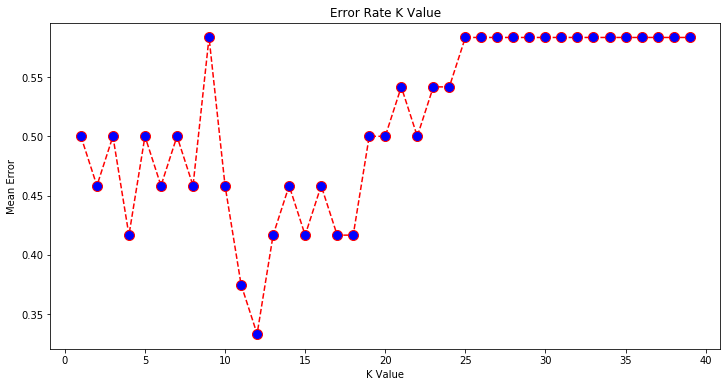

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  8]
 [ 0 10]]
              precision    recall  f1-score   support

           1       1.00      0.43      0.60        14
           2       0.56      1.00      0.71        10

    accuracy                           0.67        24
   macro avg       0.78      0.71      0.66        24
weighted avg       0.81      0.67      0.65        24

